In [12]:
import numpy as np
import pandas as pd
import uproot as up
import boost_histogram as bh
import hist
from hist import Hist
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
hep.style.use(hep.style.ROOT)

In [13]:
df = pd.read_csv("./data/kaonTree/BDT_KpinnNoov_Eval_KaonTree_NewVtx_NoGTKExtraHits.txt", sep=",", header=None)
df.drop(29, inplace=True, axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,312.0950,-131.1050,-345.2270,204.3000,18.37990,18.19380,18.27870,-0.002707,0.003251,0.002403,...,1,1,0,74.9707,9.65,-2.55,10.1413,-1.39725,0,3
1,-83.6746,-207.6290,69.7437,123.7330,2.69263,2.86549,2.63019,0.058194,0.050502,0.050138,...,1,2,0,74.4890,-25.75,2.85,-27.9529,3.42561,0,3
2,278.0880,25.8314,-126.5140,-25.6616,8.32454,8.32077,8.39304,0.066623,0.046059,0.049365,...,1,2,0,73.6523,-11.15,-1.95,-14.8583,-1.08225,0,3
3,182.2720,-94.0610,-422.5010,472.5140,21.80050,21.56530,21.57310,0.002001,-0.001506,0.004035,...,1,1,0,73.8120,-11.45,1.65,-14.5558,1.01757,0,3
4,28.4932,-159.2200,77.3324,126.2100,24.85120,24.50120,24.95190,0.065626,0.056718,0.060303,...,1,2,0,73.8851,16.55,-1.35,18.3931,0.09780,0,3


In [14]:
column_names = [
    "straw1x", "straw1y", "trim5x", "trim5y", "tktag", "tgtk", "trich",
    "mm2rich", "mm2nom", "mm2", "p", "prich", "vtxz", "vtxx", "vtxy",
    "thetax", "thetay", "rstraw1", "nktaghits", "ngtkhits",
    "region", "isUpstreamTMVA",
    "pKaon", "gtk3x", "gtk3y", "gtk2x", "gtk2y", "gtkHitsWord",
    "category"
]

df.columns = column_names

In [15]:
df['category'].value_counts() # category 1 is backgorund events drop these

3    1641133
Name: category, dtype: int64

In [ ]:
# Category 1 = Background training
# Category 2 = 
# Category 3 = signal eval
# Category 4 = sampleC (No region requirement or upstream BDT)
# Category 5 = Full pnn selection in data outside of the signal regions

In [16]:
df = df[df['category'] == 3].copy()
df.drop("category", inplace=True, axis=1)
df.to_csv("./data/kaonTree/BDT_KpinnNoov_Eval_KaonTree_NewVtx_NoGTKExtraHits.txt", sep=",", header=True, index=False)

In [10]:
sampleC = df[df['category'] == 4].copy()
sampleC.drop("category", inplace=True, axis=1)
sampleC.to_csv("./data/kaonTree/BDT_2022_SampleC_KaonTree_NewVtx_NoGTKExtra_2.txt", sep=",", header=True, index=False)

In [11]:
bkg = df[df['category'] == 5].copy()
bkg.drop("category", inplace=True, axis=1)
bkg.to_csv("./data/kaonTree/BDT_2022_BkgRegions_KaonTree_NewVtx_NoGTKExtra_2.txt", sep=",", header=True, index=False)

In [17]:
df['category'].value_counts() # category 1 is backgorund events drop these

3    1641133
Name: category, dtype: int64

In [18]:
df.drop("category", inplace=True, axis=1)
df.to_csv("./data/kaonTree/BDT_KpinnNoov_Eval_KaonTree_NewVtx.txt", sep=",", header=True, index=False)

In [11]:
del train

In [12]:
len(df)

1708430

In [13]:
df.to_csv("./data/kaonTree/BDT_KpinnNoov_Eval_KaonTree.txt", sep=",", header=True, index=False)

In [14]:
del df

In [3]:
df = pd.read_csv("./data/kaonTree/BDT_KpinnNoov_Eval_KaonTree.txt")
df.head()

,straw1x,straw1y,trim5x,trim5y,tktag,tgtk,trich,mm2rich,mm2nom,mm2,...,ngtkhits,region,isUpstreamTMVA,pKaon,gtk3x,gtk3y,gtk2x,gtk2y,gtkHitsWord,category
0,312.0950,-131.1050,-345.2270,204.3000,18.37990,18.19380,18.27870,-0.002707,0.003251,0.002403,...,1,1,0,74.9707,9.65,-2.55,10.1413,-1.39725,0,2
1,634.5720,-176.5020,-56.6356,7.3429,2.08454,2.17705,2.00025,0.051874,0.045679,0.050447,...,1,2,1,74.7481,-18.50,-4.05,-22.5619,-4.07763,0,2
2,-83.6746,-207.6290,69.7437,123.7330,2.69263,2.86549,2.63019,0.058194,0.050502,0.050138,...,1,2,0,74.4890,-25.75,2.85,-27.9529,3.42561,0,2
3,278.0880,25.8314,-126.5140,-25.6616,8.32454,8.32077,8.39304,0.066623,0.046059,0.049365,...,1,2,0,73.6523,-11.15,-1.95,-14.8583,-1.08225,0,2
4,182.2720,-94.0610,-422.5010,472.5140,21.80050,21.56530,21.57310,0.002001,-0.001506,0.004035,...,1,1,0,73.8120,-11.45,1.65,-14.5558,1.01757,0,2


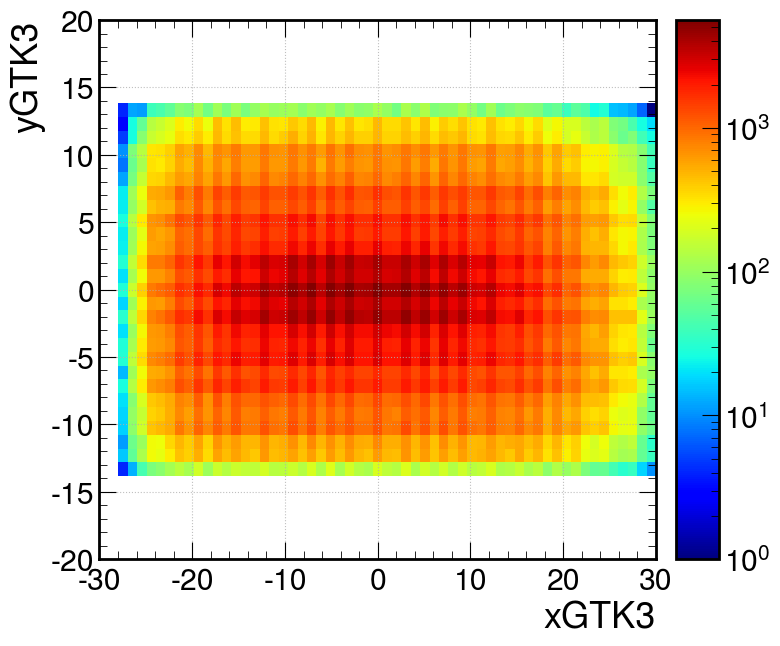

In [14]:
h, xbins, ybins = np.histogram2d(df["gtk3x"], df["gtk3y"], bins=(np.linspace(-30, 30, 60), np.linspace(-20, 20, 40)))
fig = plt.figure(figsize=(8,7))
hep.hist2dplot(h, xbins, ybins, cmap="jet", norm=LogNorm())
plt.xlabel("xGTK3")
plt.ylabel("yGTK3")
plt.grid()
plt.show()

In [16]:
rs1gtk3 = np.sqrt((df['straw1x']**2 + df['straw1y']**2)) - np.sqrt((df['gtk3x']**2 + df['gtk3y']**2))

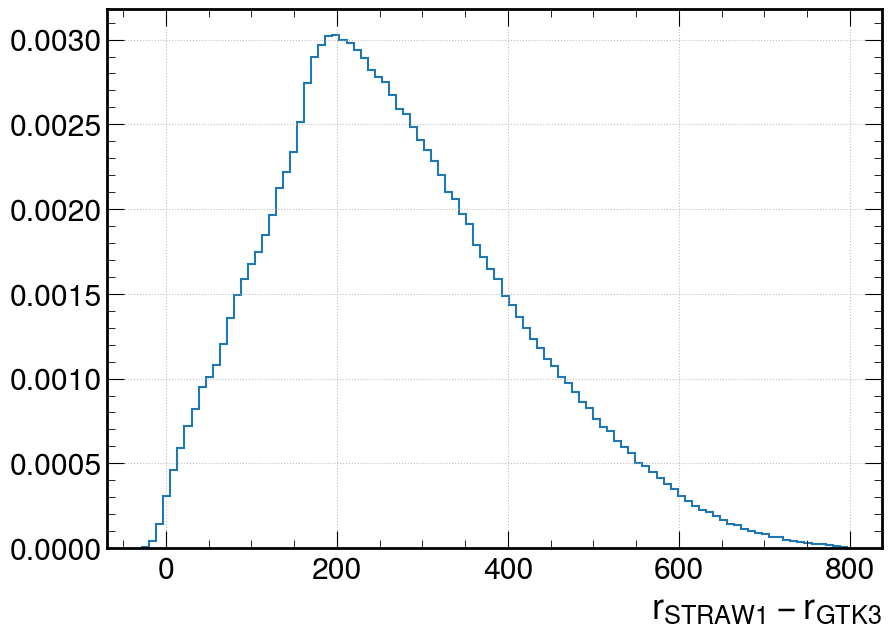

In [21]:
fig = plt.figure(figsize=(10, 7))
h, bins = np.histogram(rs1gtk3, bins=100, density=True)
hep.histplot(h, bins)
plt.xlabel(r"$r_{STRAW1}-r_{GTK3}$")
plt.grid()
plt.show()

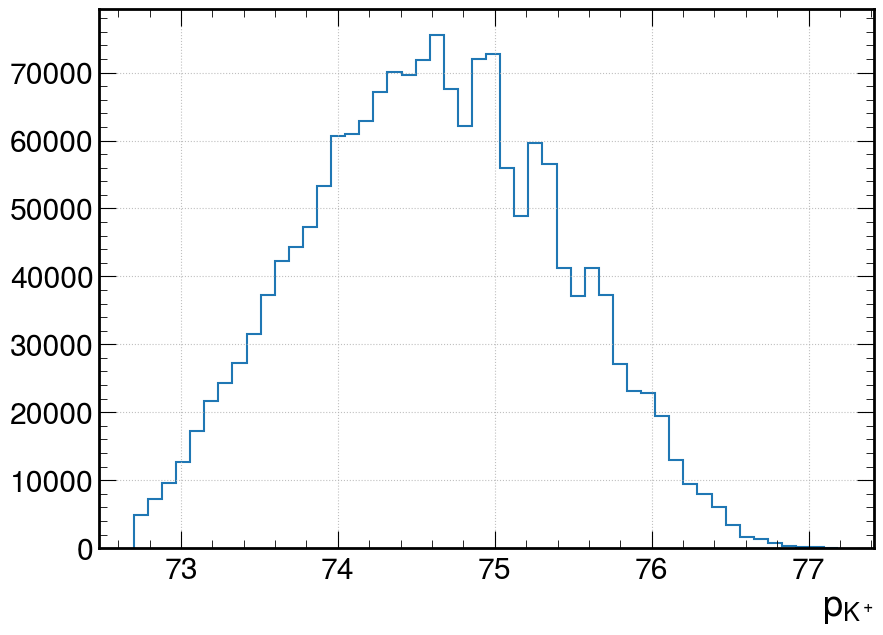

In [23]:
fig = plt.figure(figsize=(10, 7))
h, bins = np.histogram(df["pKaon"], bins=50)
hep.histplot(h, bins)
plt.xlabel(r"$p_{K^+}$")
plt.grid()
plt.show()